# Getting Dependencies

In [1]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import math
import sounddevice as sd
import random
import string
from Crypto.Cipher import AES

# Input for AES.

Text(0.5, 1.0, 'Original Audio Plot')

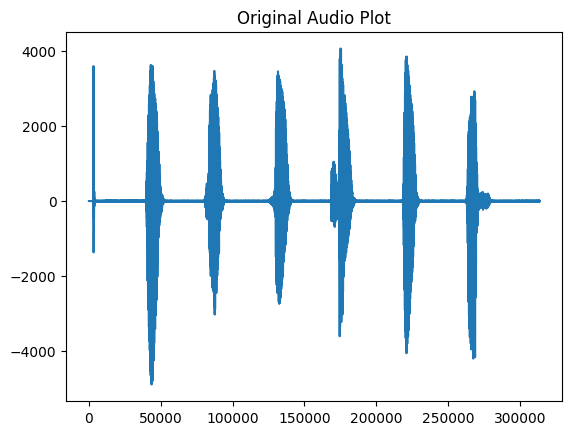

In [2]:
fs, data = wavfile.read('org_audio.wav')
plt.plot(data)            # fs = sampling frequency = 44.1kHz
plt.title("Original Audio Plot")

In [3]:
sd.play(data, fs)

In [4]:
with open('org_audio.wav', 'rb') as fd:
    contents = fd.read()

# Getting ready with AES

In [5]:
AES_KEY = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(32))

AES_IV = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(16))

In [6]:
print("AES Key is ", AES_KEY)
print("AES Initialization vector is ", AES_IV)

AES Key is  9Dxxpv7jTQjgXn5t6Ogtl5pqSNvRW5u6
AES Initialization vector is  Nr6sInXSWp9YjD3h


# Encryption using AES

In [7]:
encryptor = AES.new(AES_KEY.encode("utf-8"), AES.MODE_CFB, AES_IV.encode("utf-8"))
encrypted_audio = encryptor.encrypt(contents)

In [8]:
with open('encrypted_audio_file.wav', 'wb') as fd:
    fd.write(encrypted_audio)
print("A file titled 'encrypted_audio_file.wav' is generated which is the encrypted audio to be communicated")

A file titled 'encrypted_audio_file.wav' is generated which is the encrypted audio to be communicated


In [9]:
with open('encrypted_audio_file.wav', 'rb') as fd:
    contents = fd.read()

In [10]:
fs, data = wavfile.read('org_audio.wav')
k = np.asarray(data, dtype = np.int32)
#print(k)

# Generate Public and Private Key

In [11]:
p1 = int(input("Enter first prime number: "))
p2 = int(input("Enter second prime number: "))
p3 = int(input("Enter third prime number: "))
p4 = int(input("Enter forth prime number: "))

n = p1*p2*p3*p4
print("n = p1*p2*p3*p4 = ",n)

e = int(input("Enter a small, odd number, co-prime with n: "))
k = int(input("Enter value of k:"))

phi = (p1-1)*(p2-1)*(p3-1)*(p4-1)
print("phi = ",phi)

d = int((k*phi+1)/e)

print("d= ",d)

public_key = n,e
private_key = n,d

print("Public Key = ", public_key)
print("Private Key = ",private_key)

Enter first prime number:  3
Enter second prime number:  5
Enter third prime number:  7
Enter forth prime number:  11


n = p1*p2*p3*p4 =  1155


Enter a small, odd number, co-prime with n:  13
Enter value of k: 17


phi =  480
d=  627
Public Key =  (1155, 13)
Private Key =  (1155, 627)


# Encrypt message using public key

Text(0.5, 1.0, 'Encrypted Audio Plot')

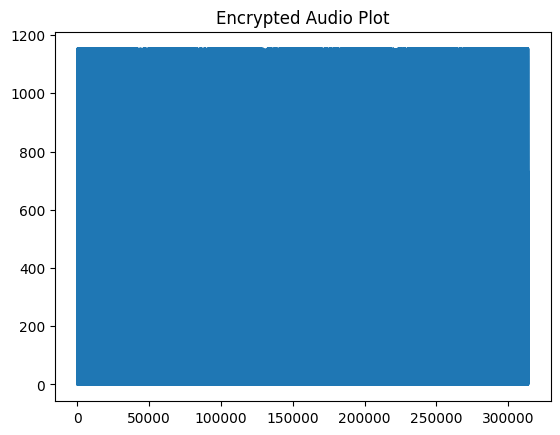

In [12]:
encrypted=[]
for i in data:
    encrypted.append((i**e)%n)
#encrypted = (data**e)%n
#print(encrypted)
plt.plot(encrypted)
plt.title("Encrypted Audio Plot")

# Write the Encrpyted File into an audio file

In [13]:
with open('encrypted_audio_file.wav', 'wb') as fd:
    fd.write(encrypted_audio)
print("A file titled 'encrypted_audio_file.wav' is generated which is the encrypted audio to be communicated")

A file titled 'encrypted_audio_file.wav' is generated which is the encrypted audio to be communicated


# Decryption

In [ ]:
#RSA Decryption:XXX

In [ ]:
'''fs, Data = wavfile.read('encrypted_audio_file.wav')
plt.plot(Data)
print(Data)
ke = np.asarray(Data, dtype = np.int32)'''

[   0    0 1154 ...  862  862    0]


Text(0.5, 1.0, 'Decrypted Audio Plot')

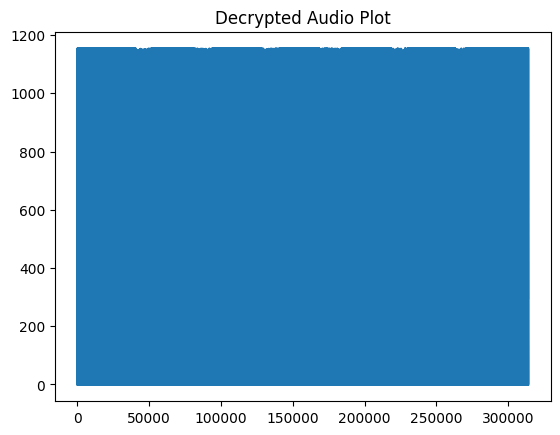

In [14]:
# Python program to compute
# factorial of big numbers

# Maximum number of digits in
# output
MAX=100000

# This function multiplies x
# with the number represented by res[].
# res_size is size of res[] or
# number of digits in the number
# represented by res[]. This function
# uses simple school mathematics
# for multiplication.
# This function may value of res_size
# and returns the new value of res_size
def multiply(x, res, res_size):

	# Initialize carry
	carry = 0

	# One by one multiply n with
	# individual digits of res[]
	for i in range(res_size):
		prod = res[i] * x + carry

		# Store last digit of
		# 'prod' in res[]
		res[i] = prod % 10

		# Put rest in carry
		carry = prod // 10

	# Put carry in res and
	# increase result size
	while (carry):
		res[res_size] = carry % 10
		carry = carry // 10
		res_size+=1

	return res_size


# This function finds
# power of a number x
def power(x,n):
	
	# printing value "1" for power = 0
	if (n == 0) :
		print("1")
		return
	
	res=[0 for i in range(MAX)]
	res_size = 0
	temp = x

	# Initialize result
	while (temp != 0):
		res[res_size] = temp % 10;
		res_size+=1
		temp = temp // 10


	# Multiply x n times
	# (x^n = x*x*x....n times)
	for i in range(2, n + 1):
		res_size = multiply(x, res, res_size)

	print(x , "^" , n , " = ",end="")
	for i in range(res_size - 1, -1, -1):
		print(res[i], end="")

#exponent = 100
#base = 2
#power(base, exponent)

decrypted = (data**d)%n
plt.plot(decrypted)
print(decrypted)
plt.title('Decrypted Audio Plot')

# Write the Decrpyted File into an audio file

In [15]:
encrypted = np.asarray(encrypted,dtype=np.int16)
wavfile.write('decrypted.wav',fs,encrypted)
print("A file titled 'decrypted.wav' is generated which is analog of the audio")

A file titled 'decrypted.wav' is generated which is analog of the audio


## Loading

In [16]:
with open('encrypted_audio_file.wav', 'rb') as fd:
    contents = fd.read()

## Decryption of data

In [17]:
decryptor = AES.new(AES_KEY.encode("utf-8"), AES.MODE_CFB, AES_IV.encode("utf-8"))
decrypted_audio = decryptor.decrypt(contents)

In [18]:
with open('decrypted_audio_file.wav', 'wb') as fd:
    fd.write(decrypted_audio)

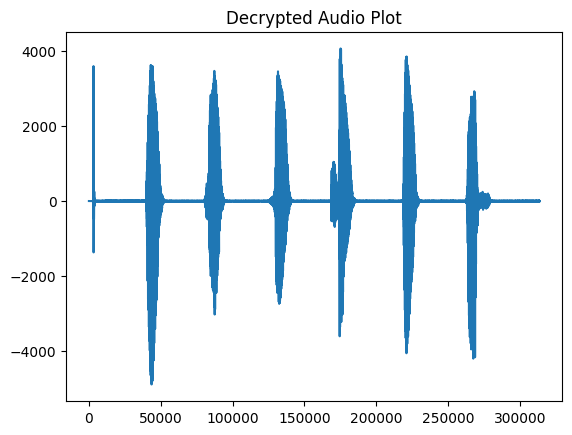

In [19]:
fs, data = wavfile.read('decrypted_audio_file.wav')
plt.plot(data)            # fs = sampling frequency = 44.1kHz
plt.title("Decrypted Audio Plot")
data_1 = np.asarray(data, dtype = np.int32)

In [20]:
sd.play(data, fs)